In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
with open("./train.pkl", 'rb') as f:
    # Loading Train Data
    train_data = pickle.load(f)

with open("./test.pkl", 'rb') as f:
    test_data = pickle.load(f)

np.random.shuffle(train_data) # Shuffling Data
splitted_train_data = np.vsplit(train_data, 10) # Splitting data into 10 equal parts

In [3]:
def calculate_bias(y_true, y_avg_pred):    
    return np.sqrt(((y_avg_pred - y_true) ** 2)).mean()

def calculate_bias_sq(y_true, y_avg_pred):    
    return (((y_avg_pred - y_true) ** 2)).mean()

def calculate_MSE(y_true, y_pred):
    return (((y_true - y_pred) ** 2).mean(axis=0)).mean()

def prepare_features(_X, degree):
    poly = PolynomialFeatures(degree)
    _X = _X.reshape(-1, 1)
    features = poly.fit_transform([example for example in _X])
    return features
    

def train(degree, data, _test_data, debug=False):
    models = [LinearRegression()] * 10    
    for index in range(10):
        X_train = data[index][:, 0]
        y_train = data[index][:, 1]
        X_train = prepare_features(X_train, degree)
        models[index].fit(X_train, y_train)
    
    predicted_y = []

    for index in range(10):
        X_test = _test_data[:, 0]
        y_test = _test_data[:, 1]
        X_test = prepare_features(X_test, degree)
        y_pred = models[index].predict(X_test)
        predicted_y.append(y_pred)

    predicted_y = np.array(predicted_y)
    predicted_y_new = predicted_y
    y_avg_pred = predicted_y.mean(axis=0)

    y_var_a = predicted_y_new.var(axis=0)
    y_var_final = y_var_a.mean()
    #print(y_var_final)
    
    mse = calculate_MSE(y_test, predicted_y)
    bias = calculate_bias(y_test, y_avg_pred)
    bias_sq = calculate_bias_sq(y_test, y_avg_pred)
    irreducible_error = mse - (bias_sq) - y_var_final
    
    if debug:    
        print("""
    Degree: {0}
    Bias: {1}
    Variance: {2}
    MSE: {3}
    Irreducible Error: {4}
    """.format(degree, bias, y_var_final, mse, irreducible_error))
    

    return bias_sq, y_var_final, irreducible_error





    Degree: 1
    Bias: 803.6647182574753
    Variance: 6.716188197652546e-26
    MSE: 1022138.070293872
    Irreducible Error: -6.716188197652546e-26
    

    Degree: 2
    Bias: 814.6081386935656
    Variance: 6.872619315157873e-26
    MSE: 1065243.9569801427
    Irreducible Error: 2.3283064365386955e-10
    

    Degree: 3
    Bias: 164.54433100597822
    Variance: 1.3582607066095381e-25
    MSE: 46677.49313466027
    Irreducible Error: 7.27595761418329e-12
    

    Degree: 4
    Bias: 170.66317068403856
    Variance: 1.0902247036771636e-25
    MSE: 45349.515690475964
    Irreducible Error: 3.637978807091702e-11
    

    Degree: 5
    Bias: 213.23714492155486
    Variance: 1.1029158979203593e-25
    MSE: 69825.30302813221
    Irreducible Error: 1.4551915228366742e-11
    

    Degree: 6
    Bias: 215.6871746642626
    Variance: 1.5464513641590627e-25
    MSE: 77535.57678435653
    Irreducible Error: -5.820766091346756e-11
    

    Degree: 7
    Bias: 216.6292535802589
    Varia

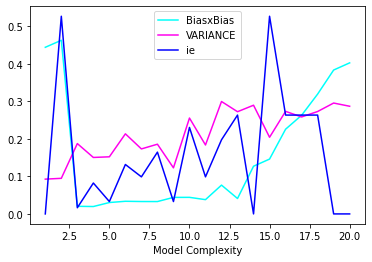

In [4]:
bias = []
variance = []
ie = []
x_axis = list(range(1, 21))
for index in range(1,21):
    # Pass True (Boolean) to train() function to print the values
    _bias, _variance, _ie = train(index, splitted_train_data, test_data, True)
    bias.append(_bias)
    variance.append(_variance)
    ie.append(abs(_ie))



data = pd.DataFrame({'degree': list(range(1,21)), 'bias': bias, 'variance': variance, 'ie': ie})

bias = bias / np.linalg.norm(bias)
variance = variance / np.linalg.norm(variance)
ie = ie / np.linalg.norm(ie)


    
# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_axis, bias, color='#00FFFB', label="BiasxBias")
ax.plot(x_axis, variance, color='#FF00ED', label="VARIANCE")
ax.plot(x_axis, ie, color = 'blue', label = "ie")
ax.set_xlabel('Model Complexity')
ax.legend()
plt.show()

In [5]:
data.head(20)

,degree,bias,variance,ie
0,1,1.022138e+06,6.716188e-26,6.716188e-26
1,2,1.065244e+06,6.872619e-26,2.328306e-10
2,3,4.667749e+04,1.358261e-25,7.275958e-12
3,4,4.534952e+04,1.090225e-25,3.637979e-11
4,5,6.982530e+04,1.102916e-25,1.455192e-11
5,6,7.753558e+04,1.546451e-25,5.820766e-11
6,7,7.604292e+04,1.255059e-25,4.365575e-11
7,8,7.582988e+04,1.346137e-25,7.275958e-11
8,9,1.013257e+05,8.898099e-26,1.455192e-11
9,10,1.016502e+05,1.851387e-25,1.018634e-10
